In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import time

from math import *

In [53]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=50
L=n*T

N_grid=20000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

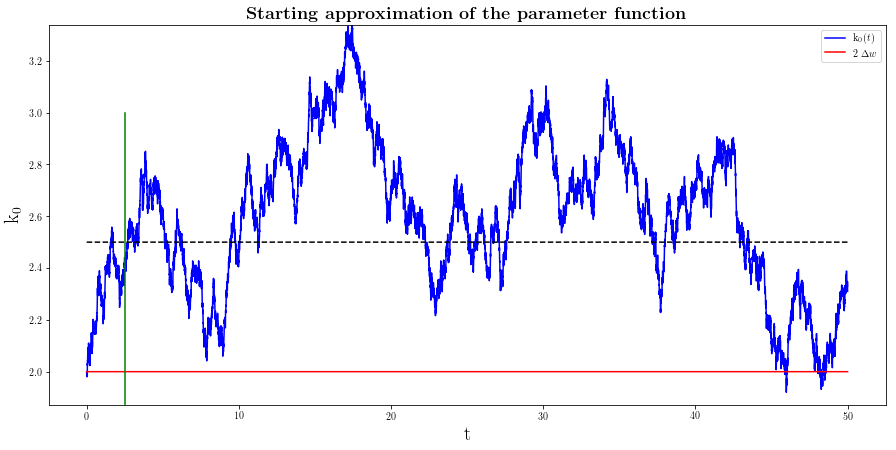

STD: 0.279094463446 0.223662720421
MEAN: 2.61479901987 2.5


In [89]:
M=2*dw

move=50

k0=np.zeros(N_grid, np.dtype(float))

# здесь можно подумать над тем, как мы его инициализируем
alpha=0.999
#alpha=1
sigma=.01
mu=(2*dw+sigma*move)*(1-alpha)
xi=sigma*np.random.randn(N_grid)+mu


for i in range(N_grid):
    if i==0:
        k0[i]=2*dw
    else:
        #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
        dif=np.random.normal(mu, sigma)
        #print(dif)
        k0[i]=alpha*k0[i-1]+dif
        if k0[i]<0:
            k0[i]=2*k0[i-1]-k0[i]
        #print(k0[i], dif)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.ylim((min(k0)-0.05, max(k0)))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*N_grid, 'r')
plt.plot(t, [(2*dw+sigma*move)]*N_grid, 'k--')
plt.plot((1/(400-400*alpha), 1/(400-400*alpha)), (1.25, 3), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

print("STD:", np.std(k0[int(1/(1-alpha)):]), np.sqrt(1/(1-alpha*alpha))*sigma)
print("MEAN:", np.mean(k0[int(1/(1-alpha)):]), (2*dw+sigma*move))